# Web Scrapping 7 film terpopuler tahun 2019 berdasarkan votes di IMDb

Kita akan mengambil data yang disediakan oleh Web IMDb yang sudah di sort berdasarkan popularitas, kemudian kita akan mengambil 7 film dengan peringkat teratas.

In [2]:
!pip install requests

In [36]:
import requests

url_get = requests.get('https://www.imdb.com/search/title/?release_date=2019-01-01,2019-12-31&sort=num_votes,desc&view=advanced')

Selanjutnya kita akan melakukan sedikit slicing untuk melihat sneak peek dari data yang kita peroleh

In [37]:
url_get.content[1:1000]

b'\n\n<!DOCTYPE html>\n<html\n    xmlns:og="http://ogp.me/ns#"\n    xmlns:fb="http://www.facebook.com/2008/fbml">\n    <head>\n         \n        <meta charset="utf-8">\n        <meta http-equiv="X-UA-Compatible" content="IE=edge">\n\n    <meta name="apple-itunes-app" content="app-id=342792525, app-argument=imdb:///?src=mdot">\n\n\n\n        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:\'java\'};</script>\n\n<script>\n    if (typeof uet == \'function\') {\n      uet("bb", "LoadTitle", {wb: 1});\n    }\n</script>\n  <script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>\n        <title>Released between 2019-01-01 and 2019-12-31\n(Sorted by Number of Votes Descending) - IMDb</title>\n  <script>(function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);</script>\n<script>\n    if (typeof uet == \'function\') {\n      uet("be", "LoadTitle", {wb: 1

Berikutnya kita akan menggunakan BeautifulSoup untuk merapikan konten dari url yang kita request sebelumnya

In [38]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


Setelah kita prettify, konten URL yang kita request tadi sekarang sudah lebih rapi dan lebih mudah dibaca.

In [39]:
print(soup.prettify()[99150:100000])

 class="clear"/>
        <div class="lister list detail sub-list">
         <div class="lister-list">
          <div class="lister-item mode-advanced">
           <div class="lister-top-right">
            <div class="ribbonize" data-caller="filmosearch" data-tconst="tt7286456">
            </div>
           </div>
           <div class="lister-item-image float-left">
            <a href="/title/tt7286456/">
             <img alt="Joker" class="loadlate" data-tconst="tt7286456" height="98" loadlate="https://m.media-amazon.com/images/M/MV5BNGVjNWI4ZGUtNzE0MS00YTJmLWE0ZDctN2ZiYTk2YmI3NTYyXkEyXkFqcGdeQXVyMTkxNjUyNQ@@._V1_UX67_CR0,0,67,98_AL_.jpg" src="https://m.media-amazon.com/images/G/01/imdb/images/nopicture/large/film-184890147._CB466725069_.png" width="67"/>
            </a>
           </div>
           <div class="lister-item-content">


Selanjutnya kita akan menggunakan method find untuk menemukan data-data yang kita inginkan, yaitu: Judul, IMDb rating, Metascore (bila ada), dan jumlah votes nya. Langkah awal kita akan mengambil data dari class lister-list terlebih dahulu, yang merupakan container dari list film yang akan kita telusuri lebih dalam pada step-step berikutnya.

In [40]:
table = soup.find('div', attrs={'class':'lister-list'})
print(table.prettify()[0:500])

<div class="lister-list">
 <div class="lister-item mode-advanced">
  <div class="lister-top-right">
   <div class="ribbonize" data-caller="filmosearch" data-tconst="tt7286456">
   </div>
  </div>
  <div class="lister-item-image float-left">
   <a href="/title/tt7286456/">
    <img alt="Joker" class="loadlate" data-tconst="tt7286456" height="98" loadlate="https://m.media-amazon.com/images/M/MV5BNGVjNWI4ZGUtNzE0MS00YTJmLWE0ZDctN2ZiYTk2YmI3NTYyXkEyXkFqcGdeQXVyMTkxNjUyNQ@@._V1_UX67_CR0,0,67,98_AL_.j


Kita akan mencari data per baris yang ada pada class lister-item mode-advanced dengan menggunakan looping untuk 7 film terpopuler.

In [63]:
temp = [] #initiating a tuple

for i in range(0, 7):
    row = table.find_all('div', class_='lister-item mode-advanced')[i]
    
    #get judul
    judul = row.find_all('a')[1].text
    
    #get IMDb rating then convert it to float datatype
    IMDb = row.find_all('strong')[0].text
    IMDb = float(IMDb)
    
    #get Metascore then convert to int datatype, jika tidak ada metascore nya, maka kita assign dengan 0
    type = 'kosong'
    meta = 0
    if row.find('span', class_='metascore favorable') != None:
        meta = int(row.find('span', class_='metascore favorable').text.strip())
        type = 'favorable'
    elif row.find('span', class_='metascore mixed') != None:
        meta = int(row.find('span', class_='metascore mixed').text.strip())
        type = 'mixed'
    elif row.find('span', class_='metascore unfavorable') != None:
        meta = int(row.find('span', class_='metascore mixed').text.strip())
        type = 'unfavorable'
        
    #get Votes then convert to int
    votes = row.find_all('span', attrs={"name": "nv"})[0].text
    votes = int(votes.replace(',',''))
    
    temp.append((judul, IMDb, meta, type, votes))
temp 

[('Joker', 8.5, 59, 'mixed', 837909),
 ('Avengers: Endgame', 8.4, 78, 'favorable', 746044),
 ('Once Upon a Time... in Hollywood', 7.7, 83, 'favorable', 498514),
 ('Chernobyl', 9.4, 0, 'kosong', 485952),
 ('Gisaengchung', 8.6, 96, 'favorable', 457832),
 ('Captain Marvel', 6.9, 64, 'favorable', 420064),
 ('Knives Out', 7.9, 82, 'favorable', 360741)]

Kemudian kita akan memasukkan data yang sudah kita scrapping tadi kedalam dataframe

In [71]:
import pandas as pd

df = pd.DataFrame(temp, columns = ('Judul','IMDb', 'metascore', 'type_metascore', 'Votes'))
df

,Judul,IMDb,metascore,type_metascore,Votes
0,Joker,8.5,59,mixed,837909
1,Avengers: Endgame,8.4,78,favorable,746044
2,Once Upon a Time... in Hollywood,7.7,83,favorable,498514
3,Chernobyl,9.4,0,kosong,485952
4,Gisaengchung,8.6,96,favorable,457832
5,Captain Marvel,6.9,64,favorable,420064
6,Knives Out,7.9,82,favorable,360741


Lalu kita akan memastikan bahwa data type yang ada di dataframe kita sudah sesuai

In [69]:
df['type_metascore'] = df['type_metascore'].astype('category')
df.dtypes

Judul               object
IMDb               float64
metascore            int64
type_metascore    category
360741               int64
dtype: object

Berikut adalah peringkat film terpopuler berdasarkan Votes yang masuk ke IMDb

<AxesSubplot:ylabel='Judul'>

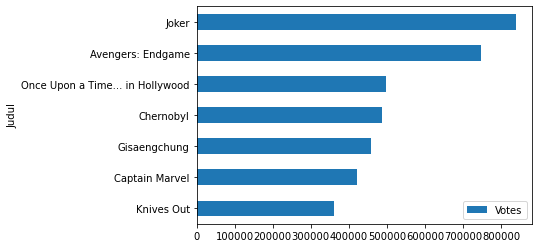

In [79]:
df[::-1].plot(x='Judul', y='Votes', kind='barh')

In [78]:
df

,Judul,IMDb,metascore,type_metascore,Votes
0,Joker,8.5,59,mixed,837909
1,Avengers: Endgame,8.4,78,favorable,746044
2,Once Upon a Time... in Hollywood,7.7,83,favorable,498514
3,Chernobyl,9.4,0,kosong,485952
4,Gisaengchung,8.6,96,favorable,457832
5,Captain Marvel,6.9,64,favorable,420064
6,Knives Out,7.9,82,favorable,360741


Hal menarik yang dapat kita lihat diatas, dari ketujuh film terpopuler diatas, Joker yang merupakan film terpopuler justru  mendapat metascore yang relatif lebih rendah, sementara untuk film lainnya (selain Chernobyl yang tidak ada score metascore nya) mendapatkan rating favorable.

Secara umum rating IMDb dan metascore cukup mirip, kecuali untuk Film Joker. Hal ini mungkin dipengaruhi oleh sistem rating pada kedua website yang mengumpulkan rating dari user. Kesimpulan lanjutan baru dapat kita tarik setelah kita mendapatkan informasi tambahan dari userbase di kedua website (persebaran usia, negara, dan sebagainya).